In [2]:
%matplotlib notebook
import numpy as np
import scipy.stats
import matplotlib.pylab as plt
from ipywidgets import interact, Button, Output, Box, IntSlider, SelectionSlider
from IPython.display import YouTubeVideo

# Linear regression

References for today's lecture:

1. Bishop, "Pattern recognition and machine learning", **Chapter 3**
1. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., *Springer*, **Chapter 3**
1. Murphy, "Machine Learning: A Probabilistic Perspective", *MIT Press*, 2012, **Chapter 7**


## Introduction

Many problems can be posed as "finding a relation" between factors/variables

This can be interpreted as predicting and/or explaining a variable given others
- Sales given money spent in advertising
- Chance to rain in Valdivia given temperature, pressure and humidity
- Gasoline consumption of a car given acceleration, weight and number of cylinders
- Chance to get lung cancer given number of smoked cigarettes per day, age and gender

We could ask
- Are these variable related?
- How strong/significant is the relationship?
- What is the nature of the relationship?

Answering these helps us **understand the underlying processes behind the data**

## Defining regression

**Regression** refers to a family of statistical methods to find **relationships** between **variables**

In general the relation is modeled as a function $g(\cdot)$ that maps two types of variables
- The input variable $X$ is called **independent variable** or feature
- The output variable $Y$ is called **dependent variable**, response or target

The mapping or function $g$ is called **predictor** or **regressor**

$$
g: X \to Y
$$

The objective is to learn $g$ such that we can predict $Y$ given $X$, *i.e.* $\mathbb{E}[Y|X]$ 

### A context for regression

- **Regression** can be defined from an statistical perspective as a special case of model fitting (parameter estimation)
- In many books **Regression** is defined from a pure-optimization perspective (deterministic)
- **Regression** is considered part of the *supervised learning* paradigm. The difference between **Regression** and *classification* is the nature of the dependent variable (continuous vs categorical)

### Parametric vs non-parametric  regression

Regression methods can be broadly classified as either parametric or non-parametric 

In parametric regression (**this lecture**)

- We know the model of the regressor
- The model has a finite number of parameters
- The parameters of the model are all we need to do predictions 
- Simpler but with bigger assumptions (inductive bias)


In nonparametric regression

- There is no functional form for the regressor
- It can have an infinite number of parameters (and a finite number of hyperparameters)
- The regressor is defined from the training data
- More flexible but requires more data to fit it
- Examples: Splines, Support vector regression, Gaussian processes


## Parametric models for regression

Let $X$ be a continuous D-dimensional variable (feature) and $Y$ be a continuous unidimensional variable (target) 

Let $\{x_i, y_i\}$ with $i=1,\ldots,N$ be a set of $N$ *iid* observations of $X$ and $Y$

Let $g_\theta$ be a model with a M-dimensional parameter $\theta$ 

Then we can define parametric regression as finding a value of $\theta$ such that 

$$
y_i \approx g_\theta(x_i),\quad i=1,\ldots, N
$$

### Linear models for regression

The simplest parametric model is the **linear model**. A linear model gives rise to **linear regression**

The linear model is linear on $\theta$ but not necessarily on $X$

For example a model with unidimensional input

$$
g_\theta \left(x_i \right) = \theta_0 + \theta_1 x_i  + \theta_2 x_i^2,
$$

is a linear model and

$$
g_\theta(x_i) = \theta_0 + \theta_1 \log(x_i),
$$

is also a linear model but

$$
g_\theta(x_i) = \theta_0 + \log(x_i + \theta_1),
$$

is not a linear model

## The simplest linear model (two-dimensions)

If we consider a one-dimensional variable $x_i \in \mathbb{R}, i=1,\ldots,N$, then the simplest linear model is

$$
g_\theta(x_i) = \theta_0 + \theta_1 x_i
$$

which has $M=2$ parameters. 

This corresponds to a line in $\mathbb{R}^2$ and we recognize

- $\theta_0$ as the intercept
- $\theta_1$ as the slope

If we consider a two-dimensional variable $x_i = (x_{i1}, x_{i2}) \in \mathbb{R}^2, i=1,\ldots,N$ then we obtain

$$
g_\theta(x_i) = \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2}
$$

which has $M=3$ parameters. This corresponds to a plane in $\mathbb{R}^3$


The most general form assumes a D-dimensional variable $x_i = (x_{i1}, x_{i2}, \ldots, x_{iD}), i=1,\ldots,N$ 

$$
g_\theta(x_i) = \theta_0 + \sum_{j=1}^D \theta_j x_{ij}
$$

which has $M=D+1$ parameters, which corresponds to an hyperplane in $\mathbb{R}^M$

### Fitting the simplest linear model

Assuming that we have $\{x_i, y_i\}_{i=1,\ldots,N}$ *iid* observations from unidimensional variables X and Y

> How do we find $\theta_0$ and $\theta_1$ such that $y_i \approx \theta_0 + \theta_1 x_i, \forall i$?

We can start by writing the squared residual (error) as 

$$
E_i^2 = (y_i - \theta_0 - \theta_1 x_i)^2
$$

We would like to make the sum of squared errors as small as we possible so we seek

$$
\min_{\theta} L = \sum_{i=1}^N E_i^2 = \sum_{i=1}^N (y_i - \theta_0 - \theta_1 x_i)^2,
$$

where $L$, the sum of squares errors, is a our loss/cost function

From here we can do

$$
\begin{align}
\frac{dL}{d\theta_0} &= -2 \sum_{i=1}^N (y_i - \theta_0 - \theta_1 x_i) \nonumber \\
&= -2 \sum_{i=1}^N y_i +  2 N\theta_0 + 2 \theta_1 \sum_{i=1}^N x_i = 0 \nonumber
\end{align}
$$

and

$$
\begin{align}
\frac{dL}{d\theta_1} &= -2 \sum_{i=1}^N (y_i - \theta_0 - \theta_1 x_i) x_i \nonumber \\
&= -2 \sum_{i=1}^N y_i x_i +  2 \theta_0 \sum_{i=1}^N x_i + 2 \theta_1 \sum_{i=1}^N x_i^2 = 0 \nonumber
\end{align}
$$

a system of two equations and two unknowns

$$
\begin{pmatrix} N & \sum_i x_i \\ \sum_i x_i & \sum_i x_i^2\\\end{pmatrix} \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix}  = \begin{pmatrix} \sum_i y_i \\ \sum_i x_i y_i \end{pmatrix} 
$$

whose solution is 

$$
\begin{pmatrix} \hat \theta_0 \\ \hat \theta_1 \end{pmatrix}  = 
\frac{1}{N\sum_i x_i^2 - (\sum_i x_i)^2}\begin{pmatrix} \sum_i x_i^2 & -\sum_i x_i \\ -\sum_i x_i & N\\\end{pmatrix}  
\begin{pmatrix} \sum_i y_i \\ \sum_i x_i y_i \end{pmatrix} 
$$

where we assume that the determinant complies with: $N\sum_i x_i^2 - (\sum_i x_i)^2 \neq 0$

Note that in this case

$$
\hat \theta_1 = \frac{\text{Cov}[x, y]}{\text{Var}[x]}, \hat \theta_0 = \bar y - \hat \theta_1 \bar x
$$

### Fitting a line using `scipy.stats.linregress`

For unidimensional $x$ and $y$ we can use `scipy` to fit a line 

In [ ]:
x = np.linspace(-5, 5, num=10);
sigma = 2.
theta = np.random.randn(2); 
print(f"theta0: {theta[0]:0.5f}, theta1: {theta[1]:0.5f}")
y = theta[0] + theta[1]*x + sigma*np.random.randn(len(x))
res = scipy.stats.linregress(x,y)
theta_hat = np.array([res.intercept, res.slope])
print(f"hat theta0: {theta_hat[0]:0.5f}, hat theta1: {theta_hat[1]:0.5f}")
print(f"r: {res.rvalue}")

fig = plt.figure(figsize=(6, 4), tight_layout=True)
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax1.plot(x, theta[0] + theta[1]*x, 'b-', linewidth=3, alpha=0.5, label='underlying'); 
ax1.plot(x, theta_hat[0] + theta_hat[1]*x, 'g-', linewidth=3, alpha=0.5, label='model'); 
ax1.scatter(x, y, c='k', s=30, label='data')
ax1.vlines(x, theta_hat[0] + theta_hat[1]*x, y, 'k', linestyles='dashed')
plt.legend();
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax2.scatter(x, y - theta_hat[0] - theta_hat[1]*x, c='k', s=30);

This is equivalent to the formulas we derived:

In [ ]:
def fit_line_model(x, y):
    sum_x2 = np.sum(x**2); 
    sum_x = np.sum(x)
    sum_xy = np.sum(x*y); 
    sum_y = np.sum(y)
    Phi = [[sum_x2, -sum_x],[-sum_x, len(x)]]
    Y = [sum_y, sum_xy]
    return np.dot(Phi, Y)/(len(x)*sum_x2 - sum_x**2)

fit_line_model(x, y)

### Quality of the linear fit

Can we measure how strong is $y$ related to $\hat y = \hat \theta_0 + \hat \theta_1 x$?

YES: **Coefficient of determination** or $r^2$
$$
r^2 = 1 - \frac{\sum_i (y_i - \hat y_i)^2}{\sum_i (y_i - \bar y_i)^2}
$$
- one minus the Sum of residuals divided by the variance of y
- $r$ is equivalent to Pearson's correlation coefficient
- $r^2 \in [0, 1]$
- If $r^2 = 1$, the data points are fitted perfectly by the model. The regressor accounts for all of the variation in y
- If $r^2 = 0$, the regression line is horizontal. The regressor accounts for none of the variation in y
- If the relation is strong but non-linear it will not be detected by $r^2$

## Ordinary Least Squares (OLS)

Now we will generalize the previous solution assuming that we have $\{x_i, y_i\}_{i=1,\ldots,N}$ *iid* observations from unidimensional  Y and **D-dimensional variable** X

> How do we find $\theta$  such that $y_i \approx \theta_0 + \sum_{j=1}^D \theta_j x_{ij}, \forall i$?

We can write the sum of squared errors (residuals) as

$$
\min_\theta L = \sum_{i=1}^N (y_i - \theta_0 - \sum_{j=1}^D \theta_j x_{ij})^2
$$

For simplicity consider the matrices
$$
X = \begin{pmatrix} 1 & x_{11} & x_{12} & \ldots & x_{1D} \\ 
1 & x_{21} & x_{22} & \ldots & x_{2D} \\
1 & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} & x_{N2} & \ldots & x_{ND} \end{pmatrix},  Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{pmatrix}, \theta =  \begin{pmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_D \end{pmatrix}
$$

With these we can write the cost function in matrix form as

$$
\min_\theta  L = \| Y - X \theta \|^2 = (Y - X \theta)^T (Y - X \theta)
$$

From here we can do

$$
\frac{dL}{d\theta} = -(Y - X \theta)^T X =  -X^T (Y - X \theta) = 0
$$

to obtain the **normal equations**

$$
X^T X \theta  = X^T Y
$$

and if $X^T X$ is invertible then

$$
\hat \theta = (X^T X)^{-1} X^T Y
$$

which  is called the **least squares (LS) estimator** of $\theta$

### Fitting an hyperplane using `np.linalg`

We can find $\theta$ by solving the normal equations with `np.linalg.lstsq`

```python
>>> theta_hat = np.linalg.lstsq(X, Y)
```

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

theta = [4, 3, 2];
sigma = 10.
X1, X2 = np.meshgrid(np.linspace(-5, 5, num=10), np.linspace(-5, 5, num=10))
XY1 = np.stack((np.ones_like(X1.ravel()), X1.ravel(), X2.ravel())).T

Y_clean = theta[0] + theta[1]*X1 + theta[2]*X2 
Y = Y_clean + sigma*np.random.randn(*Y_clean.shape)
param, MSE, rank, singval = np.linalg.lstsq(XY1, Y.ravel(), rcond=None)

fig = plt.figure(figsize=(5.5, 5), tight_layout=True)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, s=50, c='k', label='data')
ax.plot_wireframe(X1, X2, Y_clean, color='g', label='underlying')
ax.plot_wireframe(X1, X2, param[0] + param[1]*X1 + param[2]*X2, color='b', label='model')
plt.legend()

For the two-dim linear model we found these normal equations

$$
\begin{pmatrix} N & \sum_i x_i \\ \sum_i x_i & \sum_i x_i^2\\\end{pmatrix} \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix}  = \begin{pmatrix} \sum_i y_i \\ \sum_i x_i y_i \end{pmatrix} 
$$

and they can be written as
$$
\begin{align}
\begin{pmatrix} 1 & 1 & \ldots & 1 \\ x_1 & x_2 & \ldots & x_N \end{pmatrix} 
\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{pmatrix} 
\begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix}  &= 
\begin{pmatrix} 1 & 1 & \ldots & 1 \\ x_1 & x_2 & \ldots & x_N \end{pmatrix} 
\begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{pmatrix} \nonumber \\
X^T X \theta &= X^T Y \nonumber
\end{align}
$$
the same form as the general case


### Numerical considerations of the LS solution

The LS estimator is

$$
\hat \theta = (X^T X)^{-1} X^T Y
$$

The LS estimator is a batch solution, *i.e.* it uses all observations at once
- If N is large it might be impossible to obtain it
- In that case it might be better to use stochastic gradient descent 

$X^{\dagger} = (X^T X)^{-1} X^T $ is known as the [*Moore-Penrose*](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) pseudo-inverse:
- $X^{\dagger}$ is the inverse for matrices that are not squared
- If X is squared and invertible then $X^{\dagger} = (X^T X)^{-1} X^T  = X^{-1} (X^T)^{-1} X^T = X^{-1}$

The LS estimator is valid only if we can invert $X^T X$:
- $X^T X$ is a squared symmetric $M\times M$ matrix
- If $(X^T X)^{-1}$ exists the LS solution is unique and the problem is *well-posed*
- If $X^T X$ is positive definite, *i.e.* $z^T X^T X z > 0, \forall z$ then its inverse exist
- $X^T X$ being positive definite is equivalent to each of the following
    - The columns of $X$ are Linearly Independent (LI)
    - All the eigenvalues of $X^T X$ are positive
    - The Cholesky decomposition of $X^T X$ exists

**Trick of the trade:** Add a small value to the diagonal of $X^T X$ to make it invertible. We will see later that this is equivalent to regularization

### Quality of D-dimensional linear fit

In this case the **Coefficient of determination** or $r^2$ can be written as
$$
\begin{align}
r^2 &= 1 - \frac{\sum_i (y_i - \hat y_i)^2}{\sum_i (y_i - \bar y_i)^2} \nonumber \\
&= 1 - \frac{Y^T(I-X(X^TX)^{-1}X^T)Y}{Y^T (I - \frac{1}{N} \mathbb{1}^T \mathbb{1} ) Y} \nonumber \\
&= 1 - \frac{SS_{res}}{SS_{total}} \nonumber
\end{align}
$$
where $\mathbb{1} = (1, 1, \ldots, 1)$
- It has the same interpretation as explained before
- Review the previous class on ANOVA and reflect on the similarities, How do we get F distributions from $SS_{res}$ and $SS_{total}$?


## Statistical view of OLS

Up to now we have viewed regression from a deterministic (optimization) perspective

To understand the properties and do inference we seek an statistical interpretation

Assuming that we have $\{x_i, y_i\}_{i=1,\ldots,N}$ iid observations from unidimensional  Y and **D-dimensional variable** X

Let's assume that our measurements of $Y$ consists of the **true model** plus **white Gaussian noise**, *i.e.*

$$
y_i = \theta_0 + \sum_{j=1}^D \theta_j x_{ij} + \varepsilon_i, \forall i \quad \text{and} \quad \varepsilon_i \sim \mathcal{N}(0, \sigma^2)
$$

Then we can write the log likelihood of $\theta$ as 

$$
\begin{align}
\log L(\theta) &= \log \prod_{i=1}^N \mathcal{N}(y_i | (1, x_{i1}, \ldots, x_{iD}) \theta, \sigma^2) \nonumber \\
&= \sum_{i=1}^N \log \mathcal{N}(y_i | (1, x_{i1}, \ldots, x_{iD}) \theta, \sigma^2) \nonumber \\
&= -\frac{N}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - (1, x_{i1}, \ldots, x_{iD}) \theta)^2,\nonumber \\
&= -\frac{N}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} (Y-X\theta)^T (Y - X\theta) \nonumber 
\end{align}
$$


### Maximum Likelihood of Spherical Gaussian and Least Squares

Given that we know $\sigma > 0$ then

$$
\begin{align}
\max_\theta \log L(\theta) &= -\frac{N}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} (Y-X\theta)^T (Y - X\theta) \nonumber \\
&= - \frac{1}{2\sigma^2} (Y-X\theta)^T (Y - X\theta) \nonumber 
\end{align}
$$

We can change the sign and transform *max* to *min*:

$$
\begin{align}
\min_\theta \log L(\theta) &=  \frac{1}{2\sigma^2} (Y-X\theta)^T (Y - X\theta) \nonumber \\
\implies \hat \theta &= (X^T X)^{-1} X^T Y \nonumber 
\end{align}
$$

> In this case the **MLE solution is equivalent to least squares**


### Statistical properties of OLS

Let $\varepsilon = (\varepsilon_1, \varepsilon_2, \ldots, \varepsilon_N)$, where $\varepsilon_i \sim \mathcal{N}(0, \sigma^2) \forall i$ and assume that X is not random

Is the estimator unbiased?

$$
\begin{align}
\mathbb{E}[\hat \theta] &= \mathbb{E}[(X^T X)^{-1} X^T Y] \nonumber \\
&= \mathbb{E}[(X^T X)^{-1} X^T (X \theta + \varepsilon)] \nonumber \\
&= \mathbb{E}[\theta] + (X^T X)^{-1} X^T \mathbb{E}[\varepsilon] \\
& = \mathbb{E}[\theta]
\end{align}
$$

YES! 

What is the variance of the estimator? 

$$
\begin{align}
\mathbb{E}[(\hat \theta - \mathbb{E}[\hat\theta])(\hat \theta - \mathbb{E}[\hat\theta])^T] &= \mathbb{E}[((X^T X)^{-1} X^T \varepsilon) ((X^T X)^{-1} X^T \varepsilon)^T] \nonumber \\
&= (X^T X)^{-1} X^T  \mathbb{E}[\varepsilon \varepsilon^T] X ((X^T X)^{-1})^T  \nonumber \\
&= (X^T X)^{-1} X^T  \mathbb{E}[(\varepsilon-0) (\varepsilon-0)^T] X (X^T X)^{-1}  \nonumber \\
& =\sigma^2 (X^T X)^{-1}
\end{align}
$$

because the variance of $\varepsilon$ is $I\sigma^2$

Typically we estimate the variance of the noise using the unbiased estimator

$$
\begin{align}
\hat \sigma^2 &= \frac{1}{N-D-1} \sum_{i=1}^N (y_i - \theta_0 - \sum_{j=1}^D \theta_j x_{ij})^2 \nonumber \\
& = \frac{1}{N-D-1} (Y-X\theta)^T (Y-X\theta)
\end{align}
$$

(Hastie, 3.2.2) **The Gauss-Markov Theorem:** The least squares estimate of $\theta$ have the smallest variance among all unbiased estimators

### Inference with OLS

We found the expected value and the variance of $\theta$

From the properties of MLE we know that

$$
\hat \theta \sim \mathcal{N}(\theta, \sigma^2 (X^T X)^{-1})
$$

and the estimator of the variance will be proportional to

$$
\hat \sigma^2 \sim  \frac{1}{(N-M)}\sigma^2 \chi_{N-M}^2
$$

With this we have all the ingredients to find confidence intervals and do hypothesis test on $\hat \theta$

### Hypothesis test on the regression coefficients

To assess the significance of our model we might try to reject the following *hypotheses*

- One of the parameters (slopes) is zero

    $\mathcal{H}_0: \theta_i = 0$
    
    $\mathcal{H}_A: \theta_i \neq 0$
    
    
- All parameters are zero 

    $\mathcal{H}_0: \theta_1 = \theta_2 = \ldots = \theta_D = 0$

    $\mathcal{H}_A:$ At least one parameter is not zero


- A subset of the parameters are zero 

    $\mathcal{H}_0: \theta_i = \theta_j =0 $

    $\mathcal{H}_A:$ $\theta_i \neq 0 $ or $\theta_j \neq 0 $


> We can do this using t-test, f-test or ANOVA

We can trust the test only if our assumptions are true

- Relation between X and Y is linear
- Errors/noise are *iid* 
- Errors/noise follows a multivariate normal with covariance $I\sigma^2$

### Checking assumptions

1. Check the residuals for normality, Are there outliers that we should remove?
1. Check for absence of correlation in the residuals
1. Do the errors have different variance?



For the latter we can use the  **Weighted Least Squares** 


## Weighted Least Squares (WLS)


Before we assumed that the noise was homoscedastic (constant variance). We will generalize to the heteroscedastic case

Assuming that we have $\{x_i, y_i\}_{i=1,\ldots,N}$ *iid* observations from unidimensional  Y and **D-dimensional variable** X

How do we find $\theta$  such that $y_i \approx \theta_0 + \sum_{j=1}^D \theta_j x_{ij}, \forall i$?

Let's assume that our measurements of $Y$ consists of the **true model** plus **Gaussian noise** with changing variance, *i.e.*

$$
y_i = \theta_0 + \sum_{j=1}^D \theta_j x_{ij} + \varepsilon_i, \forall i \quad \text{and} \quad \varepsilon_i \sim \mathcal{N}(0, \sigma_i^2)
$$

In this case the maximum likelihood solution is 

$$
\hat \theta = (X^T \Sigma^{-1}X)^{-1} X^T \Sigma^{-1} Y
$$

where

$$
\Sigma = \begin{pmatrix} 
\sigma_1^2 & 0 &\ldots & 0 \\
0 & \sigma_2^2 &\ldots & 0 \\
\vdots & \vdots &\ddots & \vdots \\
0 & 0 &\ldots & \sigma_N^2 \\
\end{pmatrix}
$$

Note that in this case

$$
\hat \theta \sim \mathcal{N}( \theta,  (X^T X)^{-1} X^T  \Sigma X (X^T X)^{-1} )
$$


## Linear models and Basis functions

Can we estimate a model that is not an hyperplane? YES!

The most general form of a linear model is

$$
g_\theta(x_i) = \sum_{j=0}^M \theta_j \phi_j(x_i),
$$

where $\phi_j: \mathbb{R}^D \to \mathbb{R}$ is a set of basis functions

Note that M and D are not related as before

### Example: Polynomials

Unidimensional variable $x_i \in \mathbb{R}, i=1,\ldots,N$

Basis function is 
$$
\begin{align}
\phi_0 (x) &= 1 \nonumber \\
\phi_1 (x) &= x \nonumber \\
\phi_2 (x) &= x^2 \nonumber \\
& \vdots \nonumber \\
\phi_M (x) &= x^M \nonumber \\
\end{align}
$$

This yields a M-degree polynomial model

$$
g_\theta(x_i) = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \ldots + \theta_M x_i^M, \forall i
$$

It is linear in the parameters but non-linear in the input

### Example: Transformations

Unidimensional variable $x_i \in \mathbb{R}, i=1,\ldots,N$

Basis function is 

$$
\phi_j(x_i) = \cos(2\pi j x_i/P)
$$

This yields

$$
g_\theta(x_i) = \theta_0 + \theta_1 \cos(2\pi x_{i}/P) + \theta_2 \cos(4\pi x_{i}/P) + \ldots + \theta_M \cos(2M\pi x_{i}/P), \forall i
$$

A periodic model that is linear on $\theta$

### Example: Interactions between variables

Bidimensional variable $x_i = (x_{i1}, x_{i2}), i=1,\ldots,N$

Basis function is 

$$
\phi_j(x_i) = 
\begin{cases} 
1 & j=0 \\ x_{i1} & j=1 \\ 
x_{i2} & j=2 \\ x_{i1} x_{i2} & j=3 \\ 
x_{i1}^2 & j=4 \\ x_{i2}^2 & j=5 \\
\end{cases}
$$

A basis with interactions between variables up to second-degree

### Example: The simplest linear model

D-dimensional variable $x_i = (x_{i1}, x_{i2}, \ldots, x_{iD}), i=1,\ldots,N$

Basis function is 

$$
\phi_j(x_i) = \begin{cases} 1 & j=0 \\ x_{ij} & j \in [1,D] \end{cases}
$$

This yields

$$
g_\theta(x_i) = \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} + \ldots + \theta_M x_{iD}, \forall i
$$

Which is the simplest linear model we reviewed before

## Polynomial regression

We can create a polynomial basis easily using `sklearn.preprocessing.PolynomialFeatures` 

In the following example we fit an $M$ degree polynomial model. 

- What happens when $M > N$?
- What happens to the prediction on the test data point?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x = np.linspace(-5, 6, num=10); 
x_plot = np.linspace(np.amin(x), np.amax(x), num=100);
theta = [10, -2, -0.3, 0.1]
Phi = PolynomialFeatures(len(theta)-1).fit_transform(x.reshape(-1, 1))
Y_clean = np.dot(Phi, theta)
Y = Y_clean + np.random.randn(len(x))

fig = plt.figure(figsize=(6, 4), tight_layout=True)

def update(M):
    Phi = PolynomialFeatures(M-1).fit_transform(x.reshape(-1, 1))
    theta_hat, _, _, _ =  np.linalg.lstsq(Phi, Y, rcond=None)
    Y_hat = np.dot(Phi, theta_hat)
    
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax.scatter(x, Y, c='k', s=50, label='data')
    ax.vlines(x, Y_hat, Y, 'k', linestyles='dashed')  
    ax.plot(x, Y_clean, 'g--', linewidth=3, alpha=0.5, label='underlying')
    Phi_plot = PolynomialFeatures(M-1).fit_transform(x_plot.reshape(-1, 1))
    ax.plot(x_plot, np.dot(Phi_plot, theta_hat), 'b-', alpha=0.5, linewidth=3, label='model')
    ax.set_ylim([-5, 20]); 
    plt.legend()
    ax = plt.subplot2grid((3, 1), (2, 0))
    ax.plot(x, np.zeros_like(x), 'k--', alpha=0.5)
    ax.scatter(x, Y - Y_hat, c='k', s=50); 
    ax.set_title('Residuals')
    
interact(update, M=SelectionSlider(options=[1, 2, 3, 4, 5, 7, 10, 12]));

## Overfitting and regularization


In the previous example $M$ represents the complexity of the model

In general, more complex models give more flexibility to fit the data

But too much complexity causes **overfitting**
- the model fits the noise
- we can't extract the underlying behavior 
- the model **does not generalize** to new data

Ways to avoid overfitting
- Using low complexity models
- Set complexity using cross-validation 
- Regularization

### The Bias-Variance trade-off

Let's assume that the data is $y = f(x) + \varepsilon$ (true model + Gaussian noise) and that we use a linear model to find $f(x)$ as $\hat y = \sum_j \theta_j \phi_j(x)$

We can measure the quality of our model with the Mean Square Error (MSE)

$$
\begin{align}
\mathbb{E}[(y - \hat y)^2] &= \mathbb{E}[y^2 -2 y \hat y +\hat y^2] \nonumber \\
&= \mathbb{E}[(f+\varepsilon)^2 -2 (f+\varepsilon) \hat y +\hat y^2] \nonumber \\
&= \mathbb{E}[(f^2 +2 f \varepsilon + \varepsilon^2 -2 (f+\varepsilon) \hat y +\hat y^2] \nonumber \\
&= \mathbb{E}[\varepsilon^2] + f^2  -2 f \mathbb{E}[\hat y]  +\mathbb{E}[\hat y^2]  \pm \mathbb{E}[\hat y]^2  \nonumber \\
&= \mathbb{E}[\varepsilon^2] + (f - \mathbb{E}[\hat y])^2  +\mathbb{E}[(\hat y - \mathbb{E}[\hat y])^2]  \nonumber \\
&= \sigma^2 + (f - \mathbb{E}[\hat y])^2  + \text{Var}[\hat y]  \nonumber 
\end{align}
$$

> The MSE can be decomposed as irreducible error + squared bias of the estimator + variance of the estimator

- The MSE can be small if either the bias or the variance are small. The more complex the model the lower the bias and the higher the variance it attains 
- The Gauss-Markov theorem says that OLS has the minimum variance of the unbiased estimator. 
- Zero bias models are not necessarily good (overfit). In some cases we may want to trade bias for variance. This is achieved by penalizing the complexity of the model: **Regularization**


## Bayesian (MAP) Least Squares and Ridge regression


If we assume a Gaussian likelihood and a Gaussian prior we can write the log joint as

$$
\begin{align}
\log p({x}, \theta) &= \log \prod_{i=1}^N \mathcal{N}(y_i | (1, x_{i1}, \ldots, x_{iD}) \theta, \sigma^2) + \log \prod_{j=1}^M \mathcal{N}(\theta_j | 0, \sigma_0^2) \nonumber \\
&= -\frac{N}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} (Y-X\theta)^T (Y - X\theta) -\frac{M}{2} \log(2\pi \sigma_0^2) - \frac{1}{2\sigma_0^2} \|\theta\|^2 \nonumber 
\end{align}
$$

The MAP estimator of $\theta$ is given by
$$
\begin{align}
\hat \theta &= \text{arg}\max_\theta \log p({x}, \theta) \nonumber  \\
&= \text{arg}\max_\theta  - \frac{1}{2\sigma^2} (Y-X\theta)^T (Y - X\theta) - \frac{1}{2\sigma_0^2} \|\theta\|^2 \nonumber \\
&= \text{arg}\min_\theta  (Y-X\theta)^T (Y - X\theta) + \lambda \|\theta\|^2 \nonumber
\end{align}
$$
where $\lambda = \frac{\sigma^2}{\sigma_0^2}$

The solution is obtained by taking the derivative on $\theta$

$$
\frac{d}{d\theta} (Y-X\theta)^T (Y - X\theta) + \lambda \|\theta\|^2  = -X^T (Y - X\theta) + \lambda \theta = 0
$$

and finally

$$
\hat \theta = (X^T X + \lambda I)^{-1} X^T Y
$$

> This is known as Ridge regression and Tikhonov regularization

We are forcing the solution to be smooth (have small L2 norm)

This can help to avoid overfitting with complex models. It can also help when $X^T X$ is not invertible
- Adding a $\lambda$ to the diagonal of $X^T X$ makes the eigenvalues positive (unique solution)

(There is no free lunch) How to choose $\lambda$?
- Cross-validation: minimize validation error
- L-curve: Plot $ \log (Y-X\theta)^T (Y - X\theta)$ vs $ \log \|\theta\|^2$ and find the elbow

Note that different priors yield different regularization schemes
- A Laplacian prior yields a L1 norm which forces the solution to be sparse (LASSO)

### Example: Ridge Regression with sklearn

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
x = np.linspace(-5, 6, num=50); 
x_plot = np.linspace(-5, 6, num=200); 
model = np.sin(x)*x + 0.1*x**2
Y = model + np.random.randn(len(x))    

fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)
def update(lamb, M):
    regressor = make_pipeline(PolynomialFeatures(M), 
                              Ridge(normalize=True, alpha=lamb))
    regressor.fit(x.reshape(-1, 1), Y)
    ax.cla(); 
    ax.plot(x, model, 'g--', linewidth=3, alpha=0.5, label='underlying')
    ax.plot(x_plot , regressor.predict(x_plot.reshape(-1, 1)), 
            'b-', linewidth=4, alpha=0.5, label='model')
    ax.scatter(x, Y, c='k', s=50, label='data', zorder=100); 
    plt.legend()

    
interact(update, M=SelectionSlider(options=[1, 2, 3, 5, 10, 20]), 
         lamb=SelectionSlider(options=[0.0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1., 100000.]));

## Independence and correlation

>  Independence implies uncorrelatedness, but the reverse is not true.

Two variables can have zero correlation but still be dependent

> Linear regression (correlation) is sensitive to linear relationships

More generally, to test indepedence we could use:

$$
p(x,y) = p(x)p(y)
$$

Several methods are based on this
- Shannon's **Mutual Information**
$$
I(X,Y) = \int \int f_{XY}(x,y) \log \frac{f_{XY}(x,y)}{f_{X}(x) f_Y(y)} dx dy
$$
- [Correlation distance](https://arxiv.org/pdf/0803.4101.pdf)
$$
R(X,Y) = \int \int |f_{XY}(x,y)  - f_{X}(x) f_Y(y)| dx dy
$$

Although these require that we estimate the joint and the marginals (KDE, Histogram, Parametric)

For categorical variables we can use the **chi square test**



## Extra topics

Suggestions if you want to go deeper 

- (Hastie 3.4 and 3.8) L1 regularization and Least Absolute Shrinkage and Selection Operator (LASSO)
- Robust regression: Least absolute regression and M-estimators for data with outliers (non-Gaussian)
- (Hastie 6 & Bishop 6) Kernel (non-parametric) regression  
- Some of these topics can be found at [Huijse, Regresión](https://docs.google.com/presentation/d/1UUpK4zSdzRcS79V7_wU9nXe-sR7qYLEWhbmid-Rfp1k/edit#slide=id.g28044c0f85_0_34)

# Causality: Beyond correlation

## Judea Pearl - The New Science of Cause and Effect



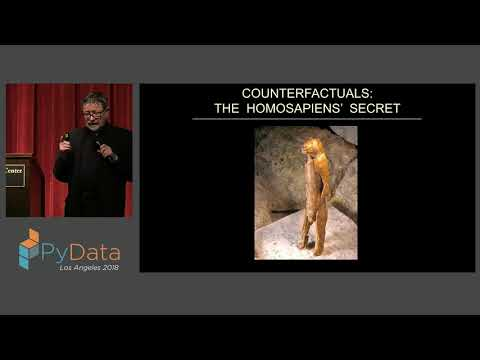

In [3]:
YouTubeVideo('ZaPV1OSEpHw')

## Do Why

Library for causal reasoning: https://github.com/microsoft/dowhy